In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.rcParams['font.sans-serif'] = ['Simsun']
plt.rcParams['axes.unicode_minus'] = False 

In [6]:
df = pd.read_excel('出柜B站.xlsx')

In [7]:
df.columns

Index(['标题', '标题链接', '图片', 'bilivideocard__statsitem',
       'bilivideocard__statsitem1', 'bilivideocard__stats__duration', '关键词',
       '信息_链接', '作者', '信息', '点赞', '投币', '收藏', '文本', '发布时间'],
      dtype='object')

In [9]:
#可以看出'bilivideocard__statsitem', 'bilivideocard__statsitem1', 'bilivideocard__stats__duration'列名冗余
#不易分别，需重命名列
df.rename(columns={df.columns[3]:'播放量',df.columns[4]:'弹幕',df.columns[5]:'时长'},inplace=True)

In [10]:
df.head(5)

,标题,标题链接,图片,播放量,弹幕,时长,关键词,信息_链接,作者,信息,点赞,投币,收藏,文本,发布时间
0,我的朋友是同性恋，出柜10年，他在深圳谈了个小11岁的男朋友,https://www.bilibili.com/video/BV1BG41137oS/,https://i2.hdslb.com/bfs/archive/c9068e6eef5fc...,11.5万,250,21:15,出柜,https://space.bilibili.com/386753444,笪屹超人_,· 9-16,2552,466,843,这是一期特别的视频，带大家认识下我身边的朋友们。如果能播且大家喜欢的话，我会持续更新，因为我...,2022-09-16 23:24:05
1,出柜/当跟爸爸说自己是姬崽时,https://www.bilibili.com/video/BV1pY4y1579v/,https://i1.hdslb.com/bfs/archive/ff00c2ccf44c7...,9.5万,104,01:08,出柜,https://space.bilibili.com/10941214,taytaymybabe,· 5-18,1.4万,42,2043,tiktok\n译制taytaymybabe,2022-05-18 19:01:42
2,通讯录一定要出柜吗？妈妈知道后哭了半年？心酸出柜史大公开！柜门的正确打开方式分享！,https://www.bilibili.com/video/BV1gd4y1g75Q/,https://i0.hdslb.com/bfs/archive/5cb551723f153...,1.1万,48,27:40,出柜,https://space.bilibili.com/32809033,ShaneH达,· 9-17,382,129,70,彩虹男孩的心酸成长史。希望有一天“出柜”不再是一个问题。\n不知道大家是怎么出柜的，对于出柜...,2022-09-17 13:47:10
3,POV：面对你出柜的不同表现,https://www.bilibili.com/video/BV1xS4y1W7Qp/,https://i1.hdslb.com/bfs/archive/ec70a8ee70471...,1.4万,5,00:14,出柜,https://space.bilibili.com/259803212,叫我GossipBoy,· 8-18,1834,3,124,来源：TIKTOK\n更多精彩请看叫我GossipBoy的个人空间https://b23.t...,2022-08-18 22:19:06
4,儿子出柜7年，一位同志母亲的自述｜从一开始的崩溃，到现在感觉他和他男友的小家庭过得很幸福,https://www.bilibili.com/video/BV1zy4y167ty/,https://i2.hdslb.com/bfs/archive/14733a8023b79...,10.9万,248,05:51,出柜,https://space.bilibili.com/423670921,EiroYu,· 2020-11-30,2988,505,1643,这次记录的是一位来自杭州朱妈妈的故事。\n第一次面对LGBT的家长们，感受到了很多因为子女出...,2020-11-30 16:45:17


In [12]:
#处理数据，因为数据中包含大量的冗余信息。如2万，需转化为20000，等
def pro_data(x):

    if  '万' in x:
        x = x.replace('万','')
        x = float(x)*10000
    return str(x)
df['播放量'] = df['播放量'].astype(str).apply(pro_data)


In [13]:
df['点赞'] = df['点赞'].astype(str).replace('点赞','').apply(pro_data).replace('', np.nan) #这些数据里空值、无关的字符串较多，统一处理一下
df['收藏'] = df['收藏'].astype(str).replace('收藏','').apply(pro_data).replace('', np.nan)
df['弹幕'] = df['弹幕'].astype(str).replace('弹幕','').apply(pro_data).replace('', np.nan)
df['投币'] = df['投币'].astype(str).replace('投币','').apply(pro_data).replace('', np.nan)

In [14]:
df['播放量'] = df['播放量'].dropna().astype('float')
df['点赞'] = df['点赞'].dropna().astype('float')
df['收藏'] = df['收藏'].dropna().astype('float')
df['弹幕'] = df['弹幕'].dropna().astype('float')
df['投币'] = df['投币'].dropna().astype('float')

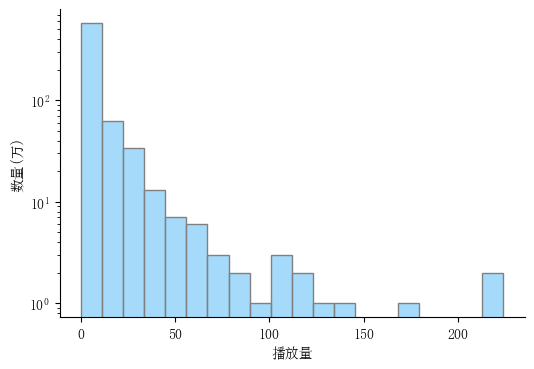

In [19]:
#视频播放量直方图，纵轴因为数据差距较大，采用对数
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
sns.histplot(df['播放量'].astype('float')/10000,bins=20,edgecolor='grey',color='#87CEFA',ax=ax)
ax.set_yscale('log')
# ax.grid()
ax.set_ylabel('数量(万)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.savefig("播放量.png")

In [21]:
#将观众互动部分重新命名为df2
df2 = df[['点赞','投币','收藏','弹幕']]

In [22]:
#将'点赞','投币','收藏','弹幕'分别除以播放量
for i in df2.columns:
    df2[i] = df2[i].div(df['播放量'])
df2.dropna(inplace=True)

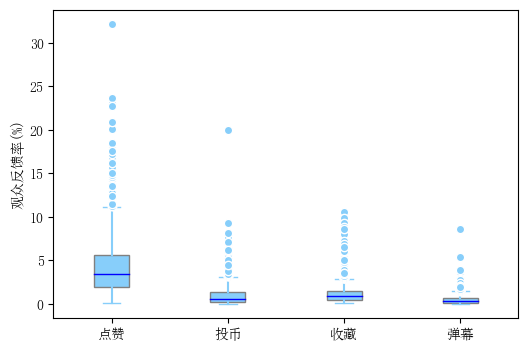

In [31]:
#观众互动率的箱线图
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
ax.boxplot(df2.values*100,widths=0.3,patch_artist=True,showfliers=True,
           boxprops={"facecolor": "#87CEFA", "edgecolor": "grey",
                          "linewidth": 1},
          whiskerprops={"color": "#87CEFA", "linewidth": 1.5},
          flierprops={'marker':'o',"markerfacecolor": "#87CEFA","markeredgecolor": "white"},
           capprops={"color": "#87CEFA","linewidth": 1},
          medianprops={'color':'blue',"linewidth": 1})
ax.set_xticks([1,2,3,4],labels=['点赞','投币','收藏','弹幕'])
ax.set_ylabel('观众反馈率(%)')
# plt.savefig("互动率.png")
plt.show()


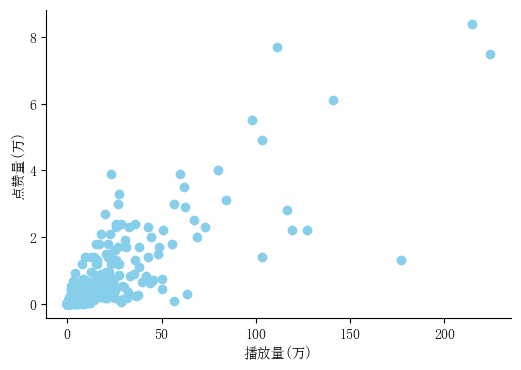

In [32]:
#播放量与点赞量的散点图
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
ax.scatter(df['播放量']/10000,df['点赞']/10000,color='skyblue')
ax.set_xlabel('播放量(万)')
ax.set_ylabel('点赞量(万)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("播放-点赞.png")

In [34]:
df['发布时间'] = pd.to_datetime(df['发布时间'])

In [35]:
day = df['发布时间'].dt.day.value_counts().sort_index()

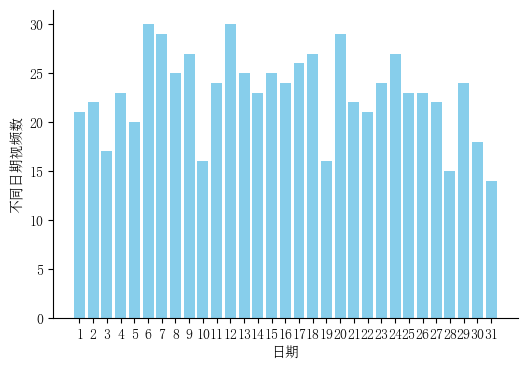

In [36]:
#1-31号的视频数量
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
ax.bar(np.arange(len(day)),day.values,color='skyblue')
ax.set_xticks(np.arange(len(day)),np.arange(len(day))+1)
ax.set_xlabel('日期')
ax.set_ylabel('不同日期视频数')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("视频数-日期.png")

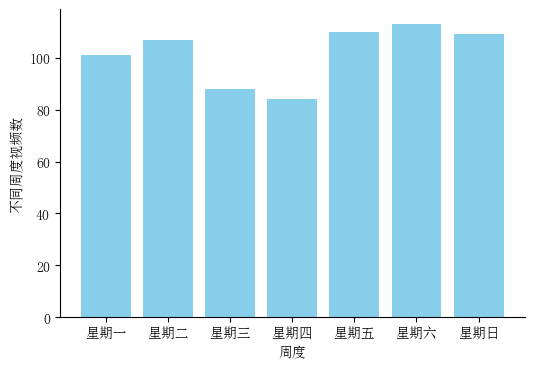

In [37]:
#周一到周日视频数量
weekday = df['发布时间'].dt.weekday.value_counts().sort_index()
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
ax.bar(np.arange(len(weekday)),weekday.values,color='skyblue')
ax.set_xticks(np.arange(len(weekday)),['星期一','星期二','星期三','星期四','星期五','星期六','星期日'])
ax.set_xlabel('周度')
ax.set_ylabel('不同周度视频数')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("周度视频数.png")

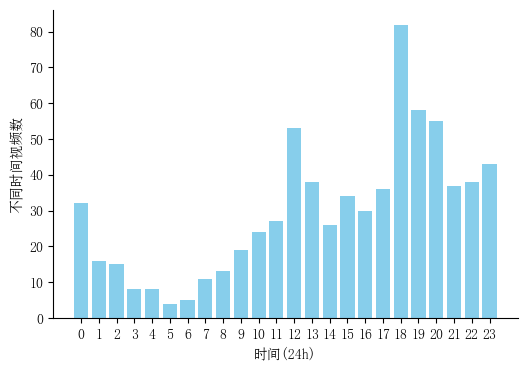

In [39]:
#0-23点视频数量
hour = df['发布时间'].dt.hour.value_counts().sort_index()
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
ax.bar(np.arange(len(hour)),hour.values,color='skyblue')
ax.set_xlabel('时间(24h)')
ax.set_ylabel('不同时间视频数')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(len(hour)))
plt.savefig("视频数-24h.png")
plt.show()

In [40]:
#将时长转化为秒
def pro_time(x):
    if len(x)==8:
        return float(x[:2])*3600+float(x[3:5])*60+float(x[6:8])
    else :
        return float(x[:2])*60+float(x[3:5])

In [41]:
#以半个小时时长分组
df['duration'] = df['时长'].map(pro_time)
df['halfhour'] = df['duration']/1800
df['halfhour'] = df['halfhour'].astype('int')

In [42]:
#以保存至数组中
data = []
for i in range(df['halfhour'].max()):
    data.append(df['播放量'][df['halfhour']==i].values)
data = np.array(data)

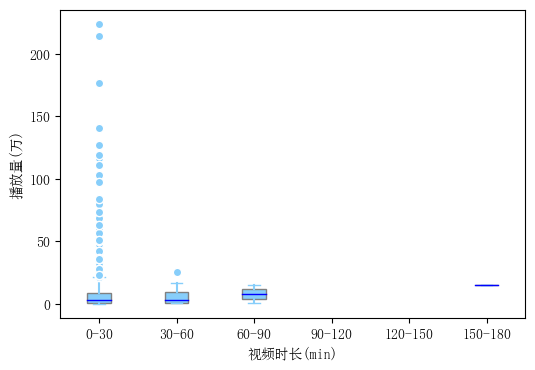

In [43]:
#视频时长与播放量箱线图
fig,ax = plt.subplots(figsize=(6,4),facecolor='white')
ax.boxplot(data/10000,widths=0.3,patch_artist=True,showfliers=True,
           boxprops={"facecolor": "#87CEFA", "edgecolor": "grey",
                          "linewidth": 1},
          whiskerprops={"color": "#87CEFA", "linewidth": 1.5},
          flierprops={'marker':'o',"markerfacecolor": "#87CEFA","markeredgecolor": "white"},
           capprops={"color": "#87CEFA","linewidth": 1},
          medianprops={'color':'blue',"linewidth": 1})
ax.set_xlabel('视频时长(min)')
ax.set_ylabel('播放量(万)')
ax.set_xticklabels(['0-30','30-60','60-90','90-120','120-150','150-180'])
plt.savefig("时长-播放量.png")
plt.show()